In [3]:
%%capture
%pip install scikit-optimize
%pip install gpflow
%pip install matplotlib

In [5]:
from skopt.benchmarks import branin as _branin
from skopt.space import Real
from skopt.utils import use_named_args
import numpy as np
import matplotlib.pyplot as plt
from gpflow.kernels import Matern52 as mt52
from skopt import BayesSearchCV
from skopt import gp_minimize

class FuncToMinimise():
    def __init__(self):
        self.regret_arr = []
        self.num_evals = 0
    
    def eval(self, x):
        print('This is a base class please specify a child')
        return

class Branin(FuncToMinimise):
    def __init__(self):
        super().__init__()
        self.optimal_val = 0.397887
        self._eval_points = []
        self._eval_vals = []
    
    def _update_regret(self):
        if self.regret_arr:
            regret = min(self.regret_arr[-1], abs(self.optimal_val-self._eval_vals[-1]))
        else:
            regret = abs(self.optimal_val-self._eval_vals[-1])
        self.regret_arr.append(regret)

    def eval(self, x):
        self.num_evals += 1
        self._eval_points.append(x)
        self._eval_vals.append(_branin(x))
        self._update_regret()
        return self._eval_vals[-1]

def plot_results(results):
    for result in results:
        plt.plot(result['regret'], label=result['name'])
        plt.legend()
    plt.yscale(value="log")
    plt.plot()

2024-12-06 12:07:07.100263: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 12:07:07.124985: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 12:07:07.334150: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 12:07:07.539470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733486827.708422    5243 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733486827.75

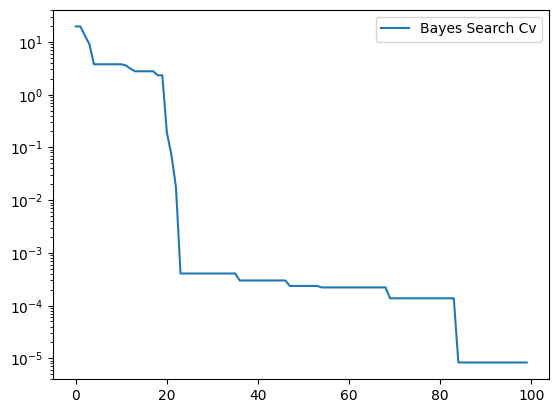

In [9]:
def main1():
    branin_instance = Branin()

    search_space = [
        Real(-5.0, 10.0, name='x1'),
        Real(0.0, 15.0, name='x2')
    ]

    @use_named_args(search_space)
    def objective_function(**params):
        x = [params['x1'], params['x2']]
        return branin_instance.eval(x)

    res = gp_minimize(
        func=objective_function,
        dimensions=search_space,
        n_calls=100,
        random_state=42
    )

    result = [{'name':'Bayes Search Cv',
            'regret':branin_instance.regret_arr}]
    
    return result, res 

result, gp_min = main1()
plot_results(result)

In [7]:
print(rs.cv_results_)

AttributeError: cv_results_

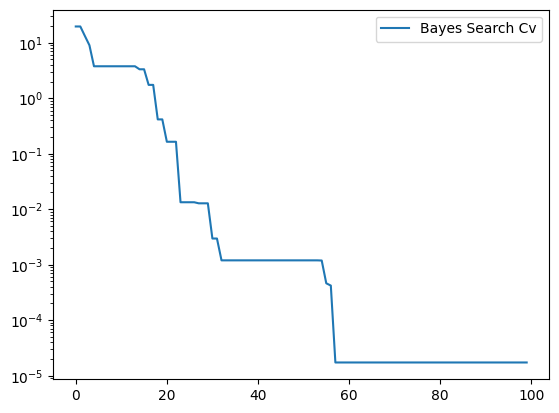

In [10]:

def main2():
    branin_instance = Branin()

    search_space = [
        Real(-5.0, 10.0, name='x1'),
        Real(0.0, 15.0, name='x2')
    ]

    @use_named_args(search_space)
    def objective_function(**params):
        x = [params['x1'], params['x2']]
        return branin_instance.eval(x)

    res = gp_minimize(
        func=objective_function,
        dimensions=search_space,
        n_calls=100,
        random_state=42,
        acq_func="EI"
    )

    result = [{'name':'Bayes Search Cv',
            'regret':branin_instance.regret_arr}]
    plot_results(result)

main2()

/home/sean/Desktop/my_repos/AFSMC/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/sean/Desktop/my_repos/AFSMC/.venv/lib/python3.12/site-packages/skopt/learning/gaussian_process/gpr.py:355: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/tmp/ipykernel_5243/2553853622.py:58: RuntimeWarning: divide by zero encountered in divide
  z = (mu_sample_opt - mu) / sigma
/home/sean/Desktop/my_repos/AFSMC/.venv/lib/python3.12/site-packages/skopt/learning/gaussian_process/gpr.py:355: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/tmp/ipykernel_5243/2553853622.py:58: RuntimeWarning: divide by zero encounte

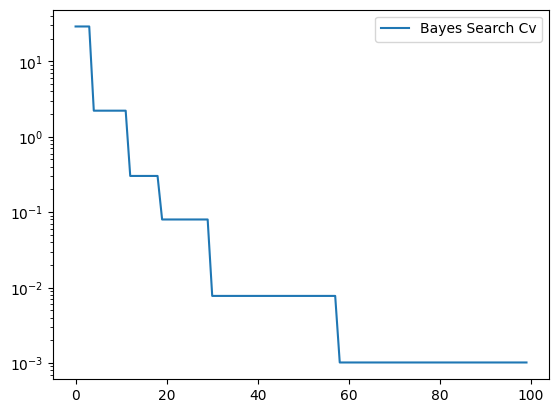

In [15]:
from skopt.learning.gaussian_process import GaussianProcessRegressor as GPR
from skopt.learning.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from scipy.stats import norm 


class FuncToMinimise():
    def __init__(self):
        self.regret_arr = []
        self.num_evals = 0
    
    def eval(self, x):
        print('This is a base class please specify a child')
        return

class Branin(FuncToMinimise):
    def __init__(self):
        super().__init__()
        self.optimal_val = 0.397887
        self._eval_points = []
        self._eval_vals = []
    
    def _update_regret(self):
        if self.regret_arr:
            regret = min(self.regret_arr[-1], abs(self.optimal_val-self._eval_vals[-1]))
        else:
            regret = abs(self.optimal_val-self._eval_vals[-1])
        self.regret_arr.append(regret)

    def eval(self, x):
        self.num_evals += 1
        self._eval_points.append(x)
        self._eval_vals.append(_branin(x))
        self._update_regret()
        return self._eval_vals[-1]
    

class gp_minimise():
    def __init__(self, func, n_dims=2, bounds=None, n_initial_points=5, n_calls=30):
        self.func = func  # Objective function (must inherit from FuncToMinimise)
        self.n_dims = n_dims
        self.bounds = bounds if bounds else [(0.0, 1.0)] * n_dims
        self.n_initial_points = n_initial_points
        self.n_calls = n_calls
        self.kernel = Matern(length_scale=np.ones(n_dims),
                             length_scale_bounds=[(0.01, 100)] * n_dims, nu=2.5)
        self.gp = GPR(kernel=self.kernel, n_restarts_optimizer=2, normalize_y=True)
        self.x_samples = []  # Sampled points
        self.y_samples = []  # Observed values

    def _expected_improvement(self, x):
        """Compute Expected Improvement at a given point x."""
        x = np.array(x).reshape(1, -1)
        mu, sigma = self.gp.predict(x, return_std=True)
        sigma = sigma.reshape(-1, 1)
        mu_sample_opt = np.min(self.y_samples)
        with np.errstate(divide='warn'):
            z = (mu_sample_opt - mu) / sigma
            ei = (mu_sample_opt - mu) * norm.cdf(z) + sigma * norm.pdf(z)
            ei[sigma == 0.0] = 0.0
        return -ei.ravel()  # Negative EI for minimization

    def _optimize_acquisition(self):
        """Optimize the acquisition function (Expected Improvement)."""
        best_x = None
        best_val = float("inf")
        for _ in range(100):  # Multiple random restarts
            x0 = np.random.uniform(*zip(*self.bounds))
            res = minimize(self._expected_improvement, x0=x0, bounds=self.bounds, method="L-BFGS-B")
            if res.success and res.fun < best_val:
                best_val = res.fun
                best_x = res.x
        if best_x is None:  # Fallback to a random point if all restarts fail
            best_x = np.random.uniform(*zip(*self.bounds))
        return best_x

    def run(self):
        """Run the optimization loop."""
        # Generate initial random points
        for _ in range(self.n_initial_points):
            x = np.random.uniform(*zip(*self.bounds))
            y = self.func.eval(x)
            self.x_samples.append(x)
            self.y_samples.append(y)

        self.gp.fit(self.x_samples, self.y_samples)

        for _ in range(self.n_calls - self.n_initial_points):
            # Optimize acquisition function to select the next point
            next_x = self._optimize_acquisition()
            next_y = self.func.eval(next_x)

            # Update GP model
            self.x_samples.append(next_x)
            self.y_samples.append(next_y)
            self.gp.fit(self.x_samples, self.y_samples)

        return self.x_samples, self.y_samples

def main():
    branin = Branin()
    bounds = [(-5.0, 10.0), (0.0, 15.0)]
    gp_opt = gp_minimise(branin,2,bounds,n_initial_points=10, n_calls=100)
    x, y = gp_opt.run()

    result = [{'name':'Bayes Search Cv',
            'regret':branin.regret_arr}]
    plot_results(result)

main()